In [63]:
# Multilinear Regression
import pandas as pd
import numpy as np

In [64]:
# loading the data
cars = pd.read_csv("./Cars.csv")
    

In [65]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [66]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

<BarContainer object of 81 artists>

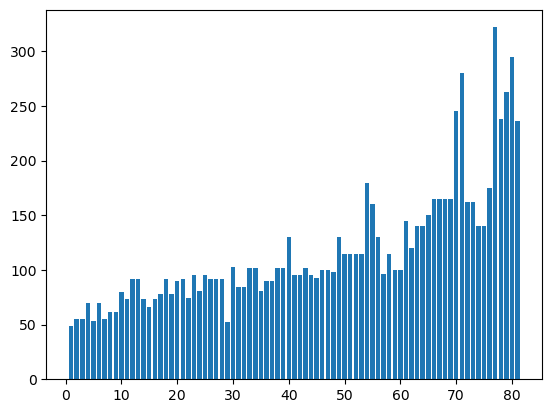

In [67]:
# HP
plt.bar(height = cars.HP, x = np.arange(1, 82, 1)) #barblot

(array([15., 35.,  9.,  6.,  9.,  0.,  2.,  2.,  1.,  2.]),
 array([ 49. ,  76.3, 103.6, 130.9, 158.2, 185.5, 212.8, 240.1, 267.4,
        294.7, 322. ]),
 <BarContainer object of 10 artists>)

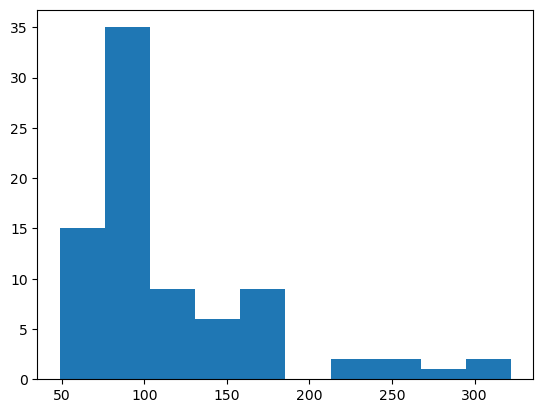

In [68]:
plt.hist(cars.HP) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x19b65ebc2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x19b65ebc800>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b65ebc0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b65ebce00>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b65ebd0d0>],
 'means': []}

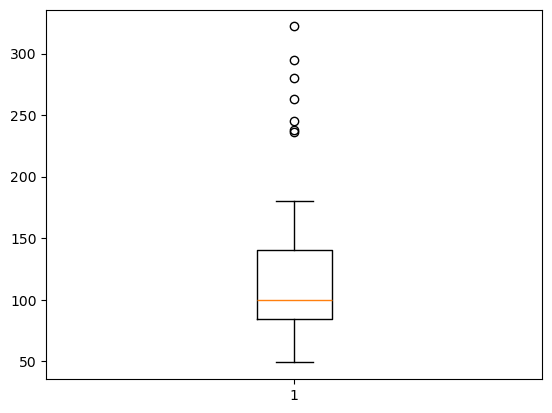

In [69]:
plt.boxplot(cars.HP) #boxplot

<BarContainer object of 81 artists>

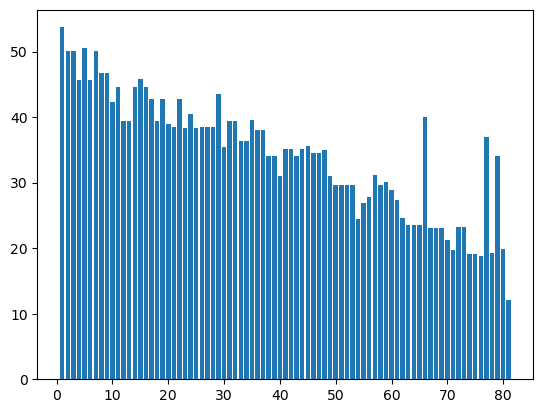

In [70]:
# MPG
plt.bar(height = cars.MPG, x = np.arange(1, 82, 1))

(array([ 1.,  6., 10.,  4., 10., 15., 17.,  8.,  5.,  5.]),
 array([12.10126289, 16.26120474, 20.42114659, 24.58108844, 28.74103029,
        32.90097213, 37.06091398, 41.22085583, 45.38079768, 49.54073953,
        53.70068138]),
 <BarContainer object of 10 artists>)

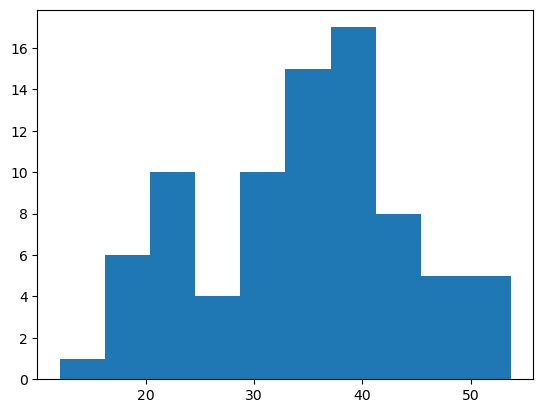

In [71]:
plt.hist(cars.MPG) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x19b6609cad0>,
 'caps': [<matplotlib.lines.Line2D at 0x19b6609cef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b6609c8c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b6609d4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b6609d790>],
 'means': []}

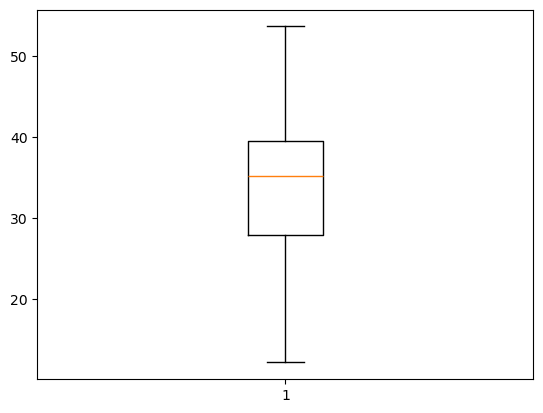

In [72]:
plt.boxplot(cars.MPG) #boxplot

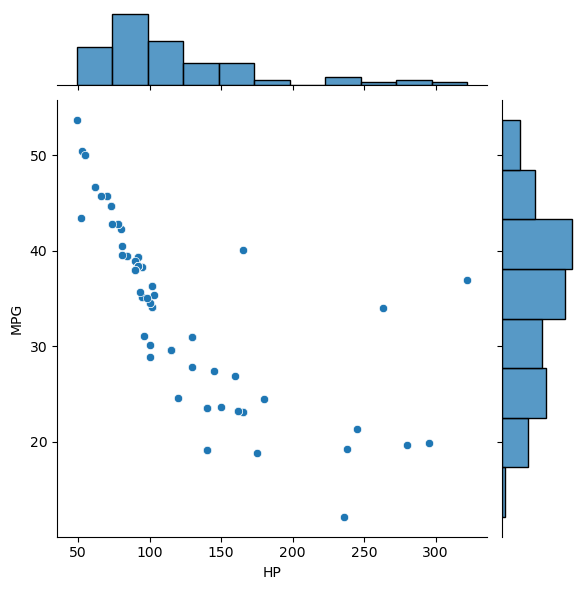

In [73]:
# Jointplot
import seaborn as sns
sns.jointplot(x=cars['HP'], y=cars['MPG'])

In [74]:
# Countplot
# plt.figure(1, figsize=(16, 10))
# sns.countplot(cars['HP'])

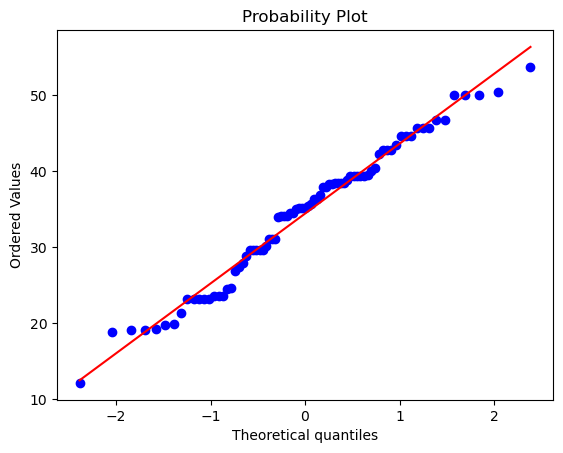

In [75]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(cars.MPG, dist = "norm", plot = pylab)
plt.show()

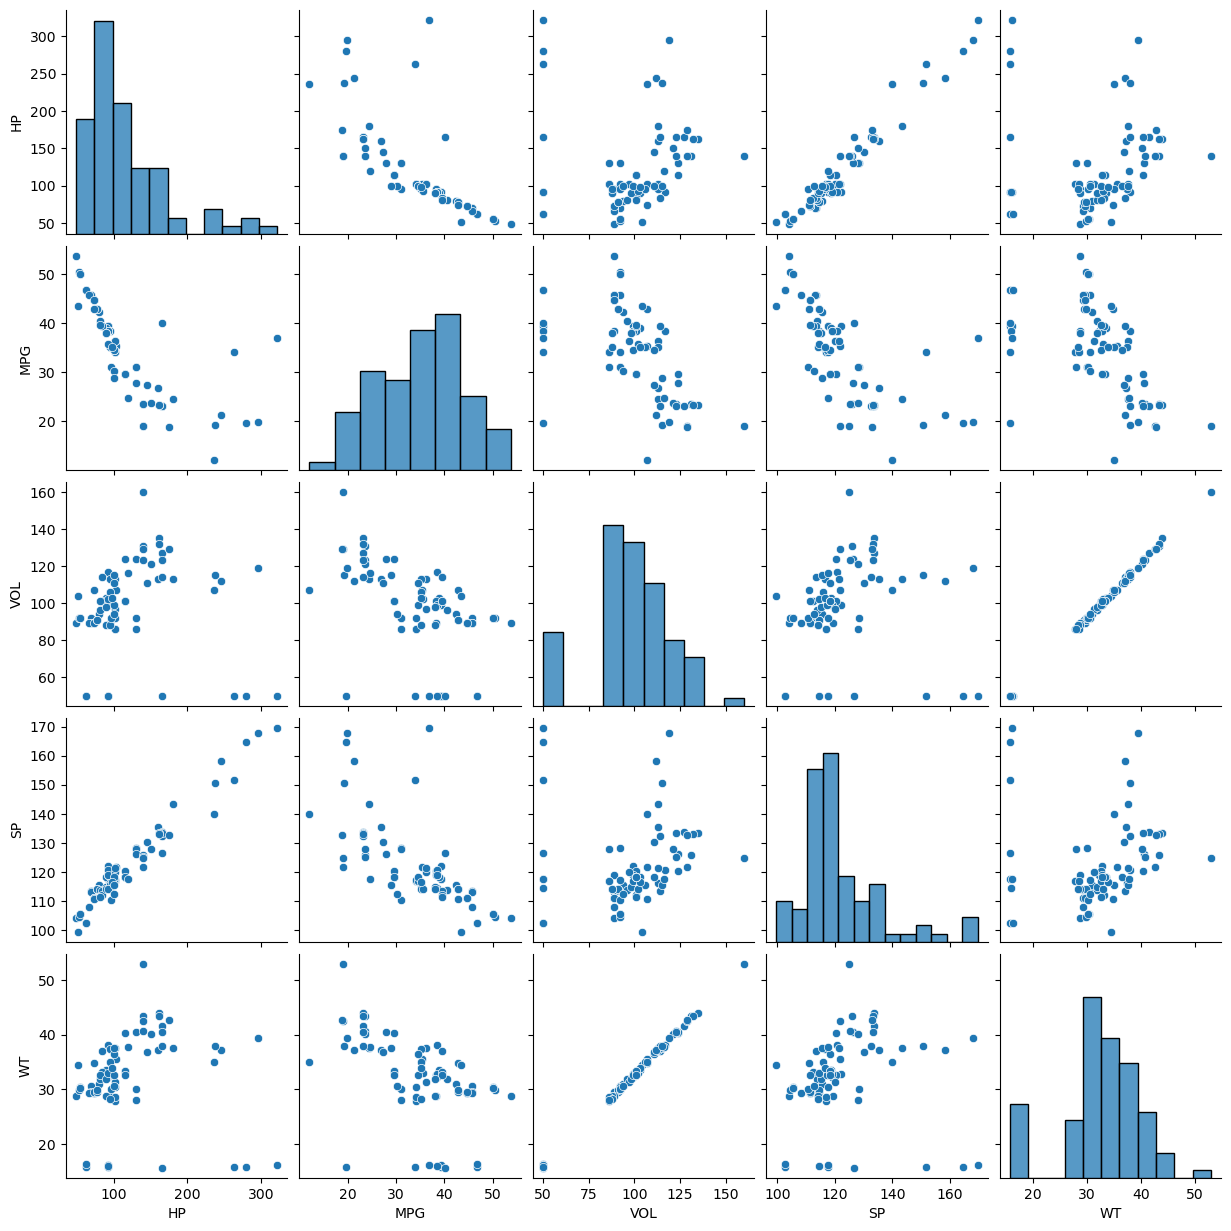

In [76]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars.iloc[:, :])

In [77]:
# Correlation matrix 
cars_corr = cars.corr()
cars_corr
# we see there exists High collinearity between input variables especially between
# [HP & SP], [VOL & WT] so there exists collinearity problem

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


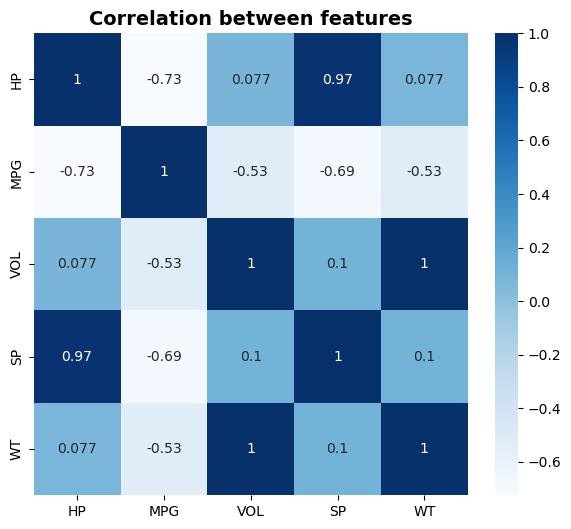

In [78]:
#Plotting the correlation heatmap for visualising the correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.title("Correlation between features", fontweight='bold', fontsize=14)
sns.heatmap(cars_corr, annot=True, cmap=sns.color_palette("Blues", as_cmap=True) )  #sns.cubehelix_palette(as_cmap=True)

plt.show()

In [79]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

In [80]:
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data = cars).fit() # regression model
#ols = odinary least square => it is optimization technique

In [81]:
# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.54e-23
Time:                        00:13:29   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

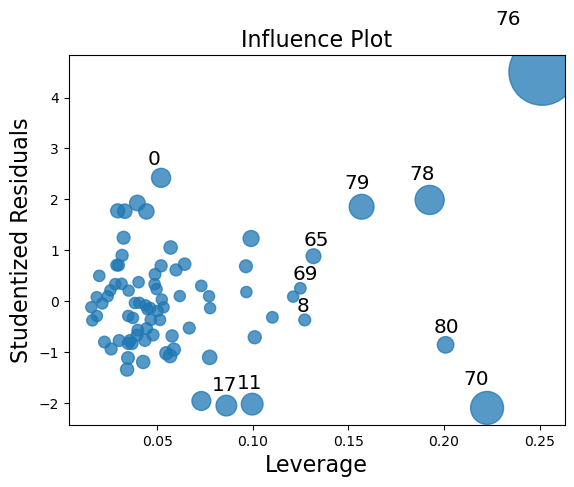

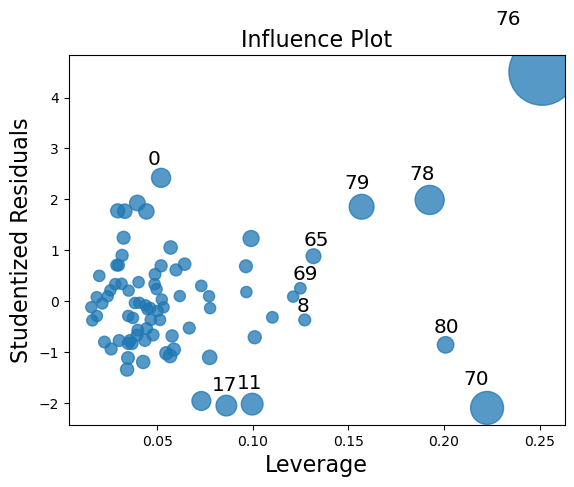

In [83]:
sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

In [84]:
cars_new = cars.drop(cars.index[[76]])

In [85]:

# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP', data = cars_new).fit()  

In [86]:
# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           4.42e-27
Time:                        00:13:29   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
SP             0.4119      0.141      2.913      0.005       0.130       0.694
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Check for Colinearity to decide to remove a variable using VIF(Varience infation factor)
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables

In [87]:
# Check for Colinearity to decide to remove a variable using VIF(Varience infation factor)
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data = cars).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data = cars).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data = cars).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data = cars).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 


In [88]:
# Storing vif values in a data frame
d1 = {'Variables':['HP', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [89]:
# Final model
final_ml = smf.ols('MPG ~ VOL + SP + HP', data = cars_new).fit()
final_ml.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.78e-28
Time:                        00:13:29   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Prediction
pred = final_ml.predict(cars_new)
pred

0     44.222122
1     42.869122
2     42.869122
3     42.766593
4     42.910283
        ...    
75    20.561966
77    15.999879
78    21.987849
79     9.544891
80    13.409222
Length: 80, dtype: float64

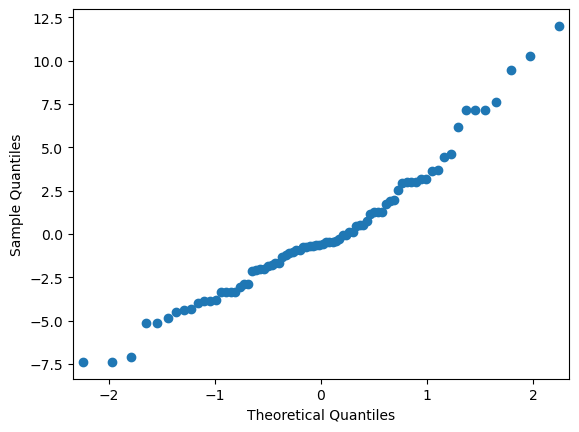

In [91]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

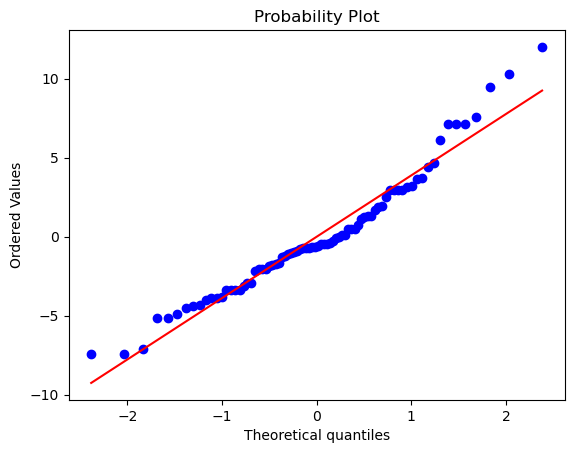

In [92]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

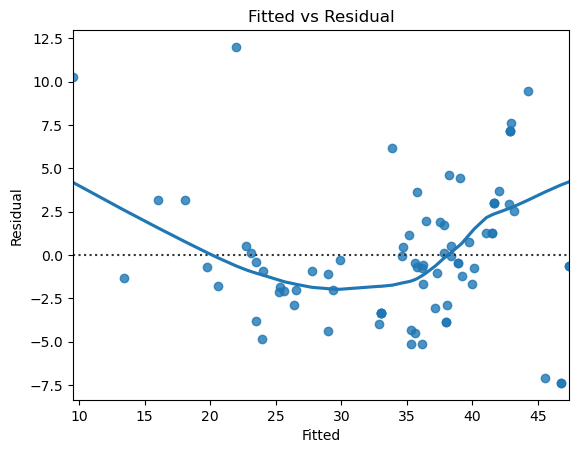

In [93]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = cars_new.MPG, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

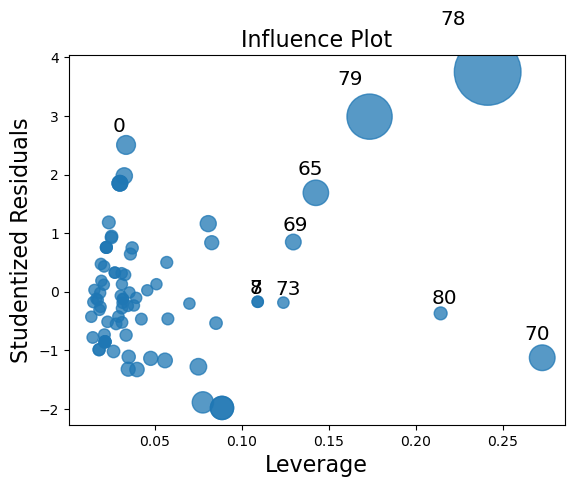

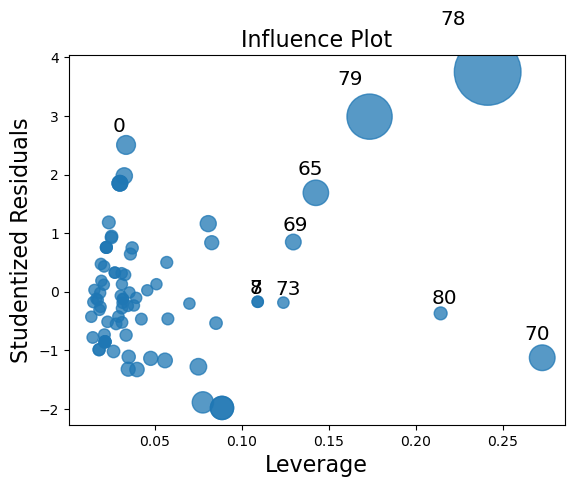

In [94]:
sm.graphics.influence_plot(final_ml)

In [95]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars_new, test_size = 0.2) # 20% test data

In [96]:
# preparing the model on train data 
model_train = smf.ols("MPG ~ HP + SP + VOL", data = cars_train).fit()

In [97]:
# prediction on test data set 
test_pred = model_train.predict(cars_test)

In [98]:
# test residual values 
test_resid = test_pred - cars_test.MPG

# test_resid

In [99]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

3.796393890231872

In [100]:
# train_data prediction
train_pred = model_train.predict(cars_train)

In [101]:
# train residual values 
train_resid  = train_pred - cars_train.MPG

In [102]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

3.9255410852670707